### Hygen Amoniku

<br>

## Project Overview

- **Goal:** Explore how clinical antibiotic resistance trends relate to environmental antibiotic contamination.
- **Datasets:** 
  - Clinical MIC & resistance data for *N. gonorrhoeae* (1979–2017)
  - Antibiotic concentrations in the Thames River (2009–2011)
- **Tech stack:** Python, pandas, matplotlib, seaborn
- **Key skills demonstrated:** data cleaning, exploratory analysis, time-series visualisation, environmental + clinical data integration.

# Antibiotic Resistance Analysis
Exploring the evolution of antibiotic resistance across clinical and environmental contexts, focusing on how factors like healthcare practices and environmental contamination contribute to resistance rates.

---
<br>

## **1. Introduction**
Antibiotic resistance stands as one of the most pressing global health challenges of the 21st century (WHO, 2014; CDC, 2013). It arises when bacteria develop mechanisms to withstand the effects of antibiotics intended to eliminate them. This escalating phenomenon poses a severe threat to public health, resulting in prolonged hospital stays, increased medical expenses, and higher mortality rates.  Environmental reservoirs, such as water systems, play a pivotal role in the spread of resistance genes (Martínez, 2009), underscoring the complex interplay between clinical practices and environmental factors in driving the evolution and dissemination of antibiotic resistance.  

#### Objectives:
- Investigate trends in antibiotic resistance over time in different regions.
- Examine environmental reservoirs of resistance genes in water systems.
- Analyze the role of environmental contamination in contributing to resistance patterns in clinical settings.

### Research Questions:

1. How have resistance levels for key antibiotics (e.g., Azithromycin, Ciprofloxacin) changed over time across different countries or regions, and which regions show the most pronounced increases or stable trends?

2. What do measured antibiotic concentrations in the Thames River reveal about potential environmental reservoirs of resistance, particularly for widely used antibiotics like Azithromycin and Ciprofloxacin?

3. Which factors, such as antibiotic type, region, or water contamination levels, most strongly predict or correlate with rising clinical resistance trends?


<br>

---

<br>

## **2. Datasets Overview**
This investigation integrates three datasets, each offering unique insights into antibiotic resistance in clinical, environmental, and agricultural contexts:

**1. Clinical Resistance Dataset (1979-2017)**:  
- Source: [Kaggle, Predicting Antibiotic Resistance in Gonorrhoea](https://www.kaggle.com/datasets/nwheeler443/gono-unitigs/data)  

While initially focused on resistance trends in N. gonorrhoeae, this dataset provides valuable metrics for analyzing broader resistance patterns across different antibiotics, including fluoroquinolones.
<br>

  ---


**2.  Antibiotic Contamination in Thames River (2009-2011)**:  
- Source: [EU Data Portal](https://data.europa.eu/data/datasets/antiviral-antibiotics-and-decongestants-in-wastewater-treatment-plants-and-receiving-rivers-in-?locale=en)  

This dataset provides measurements of antibiotic concentrations (e.g., ciprofloxacin, azithromycin, and doxycycline) at 21 locations in the Thames River catchment in England. It also includes data from wastewater treatment plants, capturing the pharmaceutical load from human activity and its potential environmental impact. This dataset allows for the analysis of how pharmaceutical contamination in water systems may contribute to environmental resistance patterns.
<br>

---

By combining these datasets, this investigation explores the interplay between clinical resistance trends, environmental reservoirs of resistance genes, and contamination of water systems. This integrated approach provides a comprehensive view of the factors driving antibiotic resistance and its dissemination.  

<br>

---

    
## **3. Data Preparation**

#### **- Importing necessary libraries**


In [1]:
# Import needed libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

#### **- Loading datasets**

In [2]:
# Load dataset
clinical_data = pd.read_csv('metadata.csv')
water_data = pd.read_csv('River_PharmaConcentrations.csv')

#### **- Overview of each dataset**

In [3]:
print("Clinical Dataset Info:")
clinical_data.info()

print("\nWater Dataset Info:")
water_data.info()

Clinical Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample_ID       3786 non-null   object 
 1   Year            3536 non-null   float64
 2   Country         3785 non-null   object 
 3   Continent       3785 non-null   object 
 4   Beta.lactamase  1927 non-null   object 
 5   Azithromycin    3480 non-null   object 
 6   Ciprofloxacin   3129 non-null   object 
 7   Ceftriaxone     3436 non-null   object 
 8   Cefixime        3405 non-null   object 
 9   Tetracycline    1472 non-null   object 
 10  Penicillin      1465 non-null   object 
 11  NG_MAST         3779 non-null   object 
 12  Group           3786 non-null   int64  
 13  azm_mic         3478 non-null   float64
 14  cip_mic         3088 non-null   float64
 15  cro_mic         3434 non-null   float64
 16  cfx_mic         3401 non-null   float64
 17  tet_mic   

#### **- Preview of datasets**

In [4]:
print("\nClinical Dataset Preview:")
print(clinical_data.head())

print("\nWater Dataset Preview:")
print(water_data.head())


Clinical Dataset Preview:
    Sample_ID    Year Country Continent Beta.lactamase Azithromycin  \
0  ERR1549286  2015.0      UK    Europe            NaN         >256   
1  ERR1549290  2015.0      UK    Europe            NaN         >256   
2  ERR1549291  2015.0      UK    Europe            NaN         >256   
3  ERR1549287  2015.0      UK    Europe            NaN         >256   
4  ERR1549288  2015.0      UK    Europe            NaN         >256   

  Ciprofloxacin Ceftriaxone Cefixime Tetracycline  ... log2_cro_mic  \
0           NaN       0.016      NaN          NaN  ...    -5.965784   
1           NaN       0.004      NaN          NaN  ...    -7.965784   
2           NaN       0.006      NaN          NaN  ...    -7.380822   
3           NaN       0.006      NaN          NaN  ...    -7.380822   
4           NaN       0.008      NaN          NaN  ...    -6.965784   

  log2_cfx_mic  log2_tet_mic  log2_pen_mic  azm_sr  cip_sr  cro_sr  cfx_sr  \
0          NaN           NaN           Na

<br>

---

<br>

### **Data Cleaning and Preprocessing for Each Dataset**
To ensure accurate and meaningful analysis, the dataset is cleaned and tidied systematically.

#### **Clinical Dataset**
This step combines multiple cleaning tasks to streamline the process:
- Remove irrelevant columns such as `Sample_ID`, `Beta.lactamase`, `NG_MAST`, and `Group`.
- Drop rows with missing critical values in `Year` and `Country`.
- Convert the `Year` column to integers for clarity.
- Remove duplicate rows.
- Normalize country names by converting them to lowercase and stripping spaces.
- Standardize column names for consistency.
- Handling Special and Missing Values: Special values such as `>256`, `<0.001`, and `>=128` are replaced with numeric equivalents to ensure numerical processing. Binary columns are validated to contain only valid values (`0`, `1`, or `NaN`) and converted to integer type.


In [5]:
# Remove irrelevant columns
columns_to_drop = [
    'Sample_ID', 'Beta.lactamase', 'NG_MAST', 'Group', 
    'log2_azm_mic', 'log2_cip_mic', 'log2_cro_mic', 
    'log2_cfx_mic', 'log2_tet_mic', 'log2_pen_mic'
]
clinical_cleaned = clinical_data.drop(columns=columns_to_drop)

# Drop rows with missing critical information
critical_columns = ['Year', 'Country']
clinical_cleaned = clinical_cleaned.dropna(subset=critical_columns)

# Convert 'Year' to integers
clinical_cleaned['Year'] = pd.to_numeric(clinical_cleaned['Year'], errors='coerce').astype('Int64')

# Normalize country names and standardize column names
clinical_cleaned['Country'] = clinical_cleaned['Country'].str.strip().str.lower()
clinical_cleaned.rename(columns=lambda x: x.strip().replace(' ', '_').lower(), inplace=True)


In [6]:
# # Display unique values in each antibiotic column
# for col in antibiotic_columns:
#     print(f"Unique values in {col}:")
#     print(clinical_cleaned[col].unique())

# Function to process special values
def process_special_values(value):
    if isinstance(value, str):
        # Match values with special characters and extract numeric part
        match = re.match(r"([<>]=?|=)?\s*([\d.]+)", value)
        if match:
            comparator, numeric_part = match.groups()
            numeric_value = float(numeric_part)
            # Adjust based on comparator
            if comparator in (">", ">="):  # For upper bounds
                return numeric_value  # Use as-is
            elif comparator in ("<", "<="):  # For lower bounds
                return numeric_value  # Use as-is
            else:
                return numeric_value  # Direct numeric value
        else:
            return np.nan  # Return NaN if no valid match
    return value  # Return value as-is if it's already numeric or None


# Apply the function to the antibiotic columns
antibiotic_columns = ['azithromycin', 'ciprofloxacin', 'ceftriaxone', 'cefixime', 'tetracycline', 'penicillin']
for col in antibiotic_columns:
    clinical_cleaned[col] = clinical_cleaned[col].apply(process_special_values)
    clinical_cleaned[col] = pd.to_numeric(clinical_cleaned[col], errors='coerce')

# Process binary columns to ensure valid values
binary_columns = ['azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr', 'pen_sr']
for col in binary_columns:
    clinical_cleaned[col] = clinical_cleaned[col].apply(lambda x: x if x in [0, 1, np.nan] else np.nan)
    clinical_cleaned[col] = clinical_cleaned[col].astype('Int64')

#### **Water Dataset**
- Focus on columns containing antibiotic concentrations and location metadata.

- Replace special values (>, <) with numeric equivalents.

- Standardize date formatting.

In [7]:
# Select relevant columns
water_cleaned = water_data[['Location ID', 'Location Name', 'DATE', 'Azithromycin (ng/L)', 'Ciprofloxacin (ng/L)', 'Doxycycline (ng/L)']].copy()

# Replace special values
water_cleaned.replace({r'[<>]': ''}, regex=True, inplace=True)

# Convert to numeric values where applicable
for col in ['Azithromycin (ng/L)', 'Ciprofloxacin (ng/L)', 'Doxycycline (ng/L)']:
    water_cleaned[col] = pd.to_numeric(water_cleaned[col], errors='coerce')

# Standardize date format (specify dayfirst=True)
water_cleaned['DATE'] = pd.to_datetime(water_cleaned['DATE'], dayfirst=True, errors='coerce')

# Rename columns for clarity
rename_columns = {
    'Location ID': 'location_id',
    'Location Name': 'location_name',
    'DATE': 'date',
    'Azithromycin (ng/L)': 'azithromycin',
    'Ciprofloxacin (ng/L)': 'ciprofloxacin',
    'Doxycycline (ng/L)': 'doxycycline'
}
water_cleaned.rename(columns=rename_columns, inplace=True)

#### **Final Adjustments**

- Categorical columns are converted to appropriate data types (e.g., category).

- Numeric formatting is adjusted to avoid unnecessary decimals.

- The index is reset for a tidy dataset.

In [8]:
# Convert columns to appropriate data types
categorical_columns = ['country', 'continent']
clinical_cleaned[categorical_columns] = clinical_cleaned[categorical_columns].astype('category')

# Format numeric display
pd.set_option('display.float_format', lambda x: f'{x:.10g}')

# Reset index
clinical_cleaned.reset_index(drop=True, inplace=True)
water_cleaned.reset_index(drop=True, inplace=True)

### **Cleaned Dataset Overview**

In [9]:
print("Cleaned Clinical Dataset Info:")
clinical_cleaned.info()
print("\nCleaned Clinical Dataset Preview:")
print(clinical_cleaned.head())  

Cleaned Clinical Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           3536 non-null   Int64   
 1   country        3536 non-null   category
 2   continent      3536 non-null   category
 3   azithromycin   3230 non-null   float64 
 4   ciprofloxacin  2838 non-null   float64 
 5   ceftriaxone    3433 non-null   float64 
 6   cefixime       3357 non-null   float64 
 7   tetracycline   1222 non-null   float64 
 8   penicillin     1222 non-null   float64 
 9   azm_mic        3228 non-null   float64 
 10  cip_mic        2838 non-null   float64 
 11  cro_mic        3433 non-null   float64 
 12  cfx_mic        3355 non-null   float64 
 13  tet_mic        1222 non-null   float64 
 14  pen_mic        1222 non-null   float64 
 15  azm_sr         3228 non-null   Int64   
 16  cip_sr         2838 non-null   Int64   
 17  cr

In [10]:
print("\nCleaned Water Dataset Info:")
water_cleaned.info()
print("\nCleaned Water Dataset Preview:")
print(water_cleaned.head())


Cleaned Water Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   location_id    126 non-null    object        
 1   location_name  126 non-null    object        
 2   date           126 non-null    datetime64[ns]
 3   azithromycin   10 non-null     float64       
 4   ciprofloxacin  36 non-null     float64       
 5   doxycycline    21 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 6.0+ KB

Cleaned Water Dataset Preview:
  location_id      location_name       date  azithromycin  ciprofloxacin  \
0         TC1  Thame at Wheatley 2010-03-15           NaN            NaN   
1         TC1  Thame at Wheatley 2011-05-11           NaN            NaN   
2         TC1  Thame at Wheatley 2009-11-10           NaN    13.66666667   
3         TC1  Thame at Wheatley 2009-11-16         


<br>

---
<br>

## 4. Data Analysis


### **4.1 Clinical Dataset**
### **Descriptive Statistics**

In [11]:
# Descriptive statistics for relevant columns
relevant_columns = [
    'azithromycin', 'ciprofloxacin', 'ceftriaxone', 
    'cefixime', 'tetracycline', 'penicillin'
]
clinical_stats = clinical_cleaned[relevant_columns].describe()
print("Clinical Dataset Descriptive Statistics (Relevant Columns):")
print(clinical_stats)

# Count missing values
clinical_missing_values = clinical_cleaned[relevant_columns].isnull().sum()
print("\nClinical Dataset Missing Values (Relevant Columns):")
print(clinical_missing_values)

# Frequency counts and proportions for binary columns
binary_columns = ['azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr', 'pen_sr']

print("\nClinical Dataset Frequency Counts and Proportions (Binary Columns):")
for col in binary_columns:
    counts = clinical_cleaned[col].value_counts(dropna=False)
    proportions = counts / counts.sum() * 100
    print(f"\nColumn: {col}")
    print("Counts:")
    print(counts)
    print("Proportions (%):")
    print(proportions.round(2))


Clinical Dataset Descriptive Statistics (Relevant Columns):
       azithromycin  ciprofloxacin   ceftriaxone      cefixime  tetracycline  \
count          3230           2838          3433          3357          1222   
mean      10.025387    7.032019345 0.03495186426 0.06359934465   6.629152209   
std     47.39962996    10.49623318  0.1931770726  0.1611736622   21.22862886   
min           0.008          0.002       0.00025         0.001         0.008   
25%           0.125          0.004         0.004         0.015           0.5   
50%            0.38         0.0615         0.015         0.016             1   
75%               1             16         0.032          0.06             4   
max             512             64             7             4           256   

       penicillin  
count        1222  
mean  3.164409165  
std   10.85116104  
min         0.002  
25%          0.25  
50%             1  
75%             2  
max           256  

Clinical Dataset Missing Values (Relev

The descriptive statistics for the clinical dataset highlight key trends in antibiotic resistance across different regions and years:

- Azithromycin: High variability is observed, with a mean resistance level of 10.03 and a standard deviation of 47.40. Notably, the maximum resistance level reaches 512.
  
- Ciprofloxacin: Resistance values are similarly variable, with a mean of 7.03 and a maximum of 64, indicating significant resistance in some regions.
  
- Ceftriaxone and Cefixime: Both show relatively low mean resistance levels (0.035 and 0.064, respectively), but some regions approach or exceed thresholds for reduced susceptibility.
   
- Tetracycline and Penicillin: These older antibiotics exhibit widespread resistance, with means of 6.63 and 3.16, and maximum resistance levels of 256 each.

#### Missing Values:
Certain antibiotics, such as Tetracycline and Penicillin, have significant gaps in data (missing values over 60%), likely due to varying testing priorities or incomplete records.
Missing data highlights the need for robust data collection frameworks to comprehensively assess resistance trends.


#### Binary Resistance Columns (_sr):
These columns represent whether resistance thresholds were met (0 or 1), with missing values (<NA>) indicating untested samples:
- Azithromycin (azm_sr): Resistance was detected in 12.56% of tested samples, while 78.73% remained below resistance thresholds. Approximately 8.71% of data is missing.
- Ciprofloxacin (cip_sr): A balanced distribution shows 43.5% non-resistant and 36.76% resistant samples, but nearly 20% of data is missing.
- Ceftriaxone (cro_sr) & Cefixime (cfx_sr): Resistance levels are negligible, with most samples non-resistant (96.97% and 94.74%, respectively). Missing values range from 2.91% to 5.12%.
- Tetracycline (tet_sr) & Penicillin (pen_sr): Resistance is more common (17.05% and 13.55%, respectively), but a significant portion of data is missing (65.44%).

The percentages represent overall resistance levels across all years and regions combined. While this provides a high-level overview, it does not account for temporal or regional variations, which are explored in subsequent analyses.

<br>

---

<br>

### Pie Charts: Clinical Binary Resistance

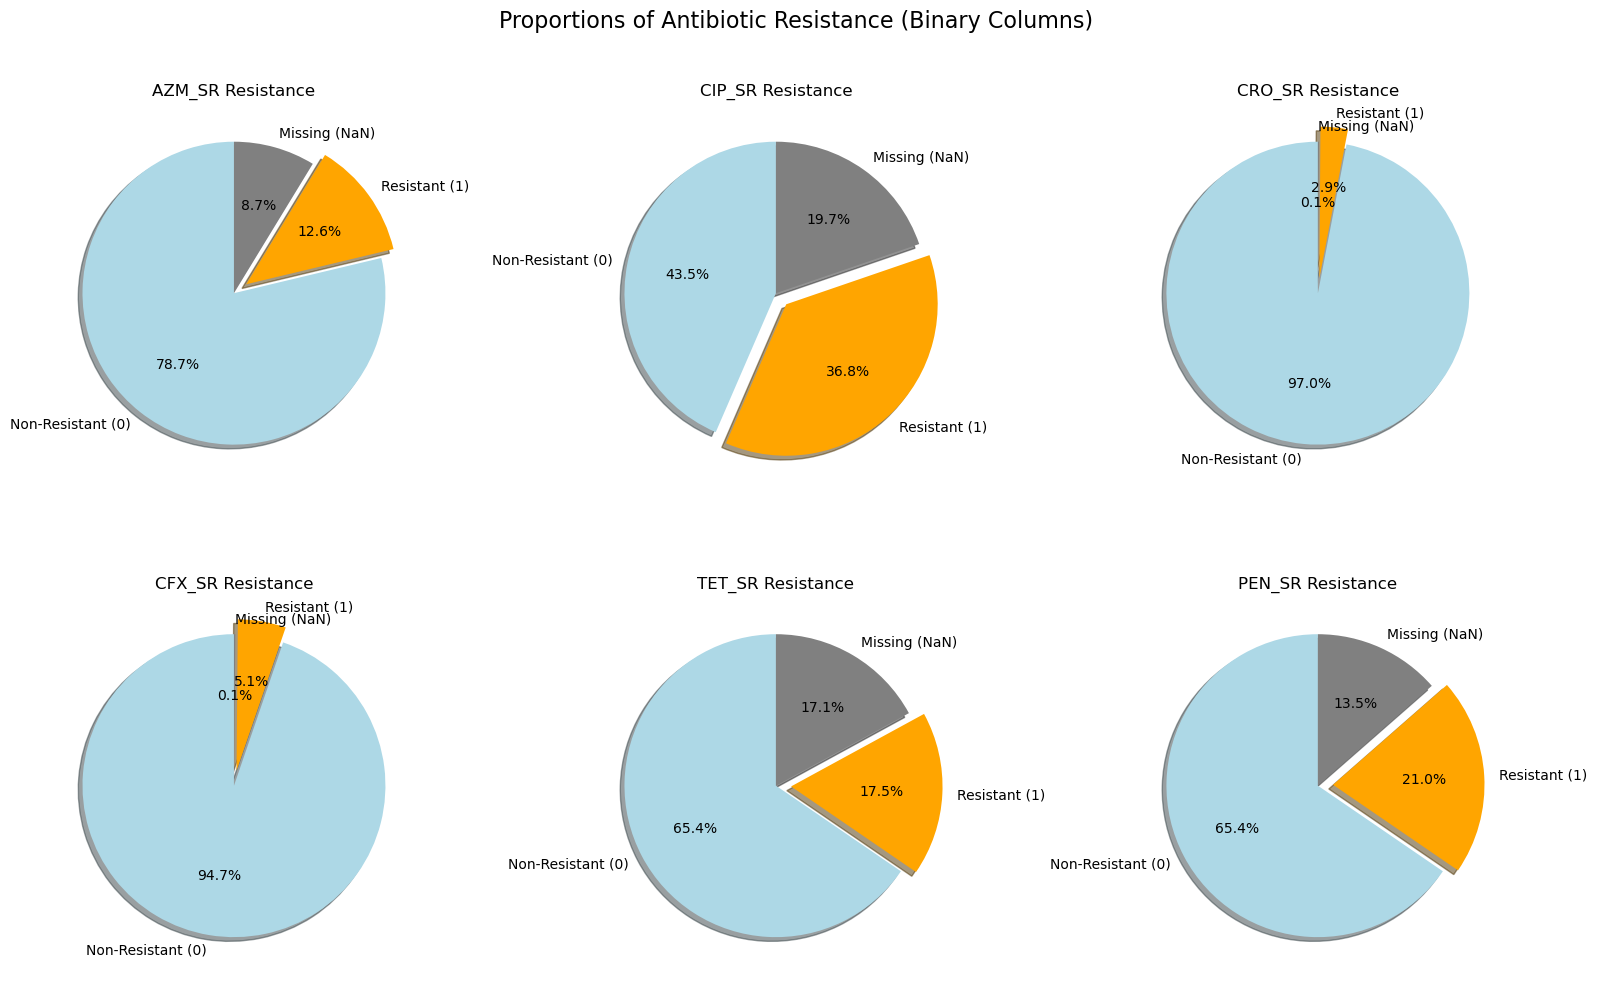

In [12]:
# List of binary resistance columns
binary_columns = ['azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr', 'pen_sr']

# Set up the figure for multiple pie charts
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(16, 10)
)  # Adjust rows/columns to match the number of binary columns
axes = axes.flatten()  # Flatten axes for easier iteration

# Loop through each binary resistance column
for i, column in enumerate(binary_columns):
    # Calculate counts and proportions
    counts = clinical_cleaned[column].value_counts(dropna=False)
    proportions = counts / counts.sum() * 100

    # Create labels for the pie chart
    labels = ['Non-Resistant (0)', 'Resistant (1)', 'Missing (NaN)']

    # Assign colors for better differentiation
    colors = ['lightblue', 'orange', 'gray']

    # Plot the pie chart
    axes[i].pie(
        proportions,
        labels=labels,
        autopct='%1.1f%%',  # Show percentages
        startangle=90,      # Rotate for alignment
        colors=colors,     
        explode=(0, 0.1, 0),  # Slightly separate resistant for emphasis
        shadow=True        
    )
    
    # Add a title for each subplot
    axes[i].set_title(f"{column.upper()} Resistance", fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Add an overall title for all pie charts
fig.suptitle("Proportions of Antibiotic Resistance (Binary Columns)", fontsize=16, y=1.02)

# Show the figure
plt.show()



These proportions indicate **how prevalent resistance is** for each antibiotic, along with how many samples lack data. Antibiotics like **Ceftriaxone** and **Cefixime** show **negligible resistance** proportions (under 6%), while **Ciprofloxacin** has a **significantly higher** fraction of resistant samples (around 37%). Tetracycline and Penicillin are also relatively high in resistance (17%–21%). 
This high-level overview helps us quickly spot which antibiotics still retain **lower resistance** (e.g., Ceftriaxone, Cefixime) and which display **widespread resistance** (Ciprofloxacin, Tetracycline, Penicillin). It also highlights the **missing data** issue, which may affect interpretations and suggests further data-collection improvements. 

<br>

---

<br>

#### **Histograms**


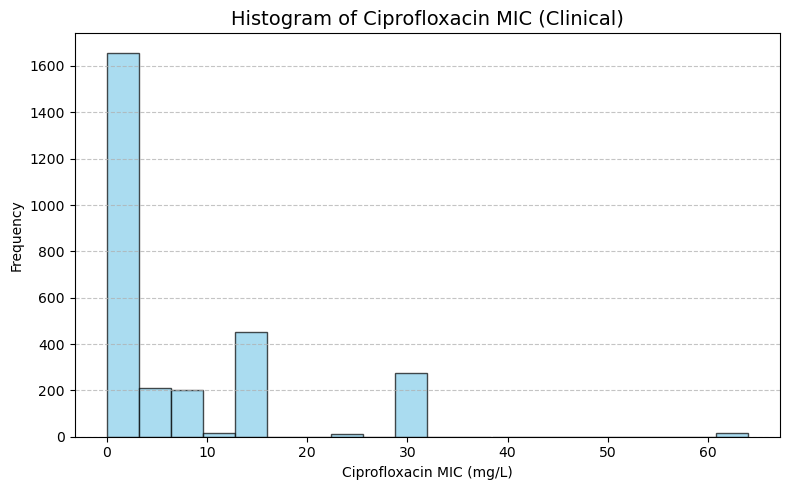

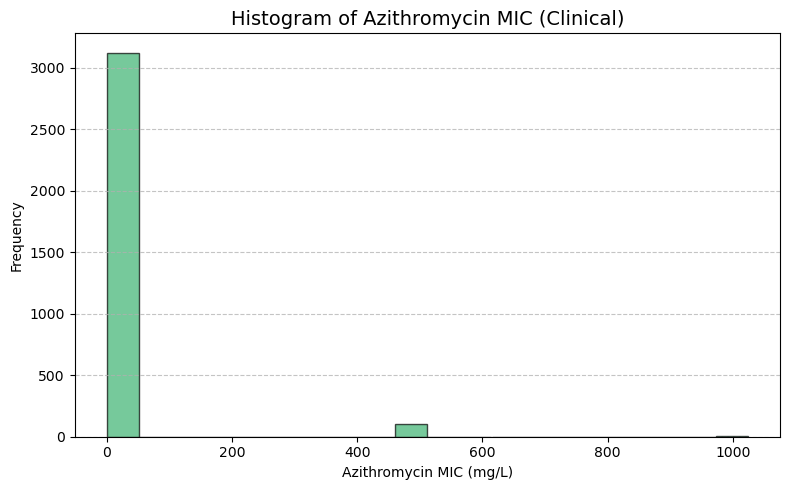

In [13]:
# Filter out NaN values for ciprofloxacin MIC
cip_mic_data = clinical_cleaned['cip_mic'].dropna()

plt.figure(figsize=(8, 5))
plt.hist(cip_mic_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Ciprofloxacin MIC (Clinical)", fontsize=14)
plt.xlabel("Ciprofloxacin MIC (mg/L)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.tight_layout()
plt.show()

# Filter out NaN values for azithromycin MIC
azm_mic_data = clinical_cleaned['azm_mic'].dropna()

plt.figure(figsize=(8, 5))
plt.hist(azm_mic_data, bins=20, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title("Histogram of Azithromycin MIC (Clinical)", fontsize=14)
plt.xlabel("Azithromycin MIC (mg/L)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.tight_layout()
plt.show()

**Ciprofloxacin MIC Histogram Summary**

The histogram for Ciprofloxacin MIC values shows that over 50% of the 2,838 samples have very low MIC values (mostly within the lowest bin up to ~3.2 mg/L, with a median of 0.0615 mg/L). However, the mean value is much higher (approximately 7.20 mg/L) due to a small number of substantial outliers—indicated by clusters in higher bins. This contrast between the low median and increased mean reflects the presence of a subgroup with markedly higher resistance.

**Azithromycin MIC Histogram Summary**

For Azithromycin, nearly all of the 3,228 samples fall into the lowest bin (up to about 51 mg/L), with a median value of 0.38 mg/L. Despite this, the mean MIC is elevated (around 18.42 mg/L) because of a few extreme outliers, as demonstrated by a small number of samples with MICs reaching up to 1,024 mg/L. This suggests that while the vast majority of isolates exhibit very low MICs, a minor proportion shows significantly high resistance.


---

### **Scatter Plot Analysis: Ciprofloxacin MIC**

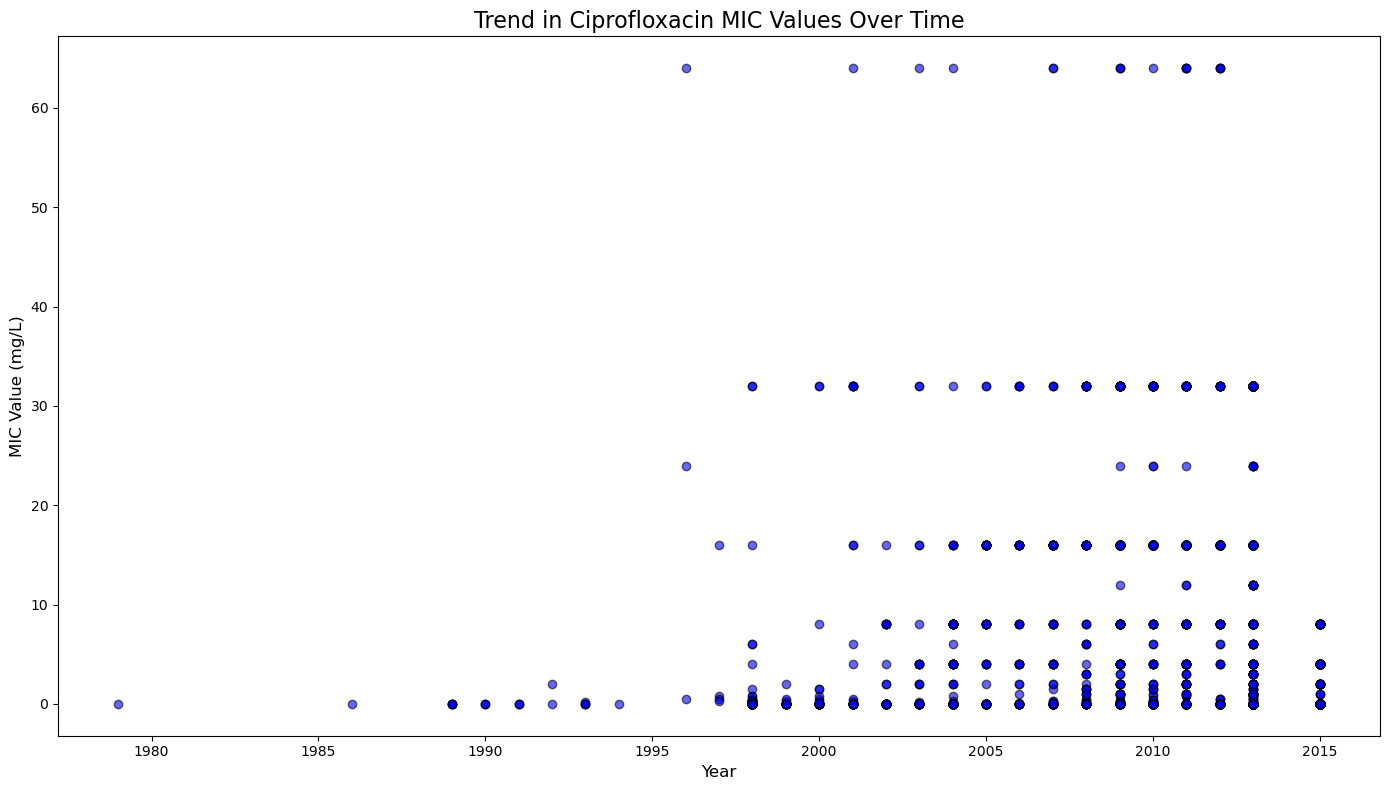

In [14]:
# CIPROFLOXACIN MIC SCATTER PLOT 

# Filter for relevant data
cip_scatter_data = clinical_cleaned[['year', 'cip_mic']].dropna()

# Plot the scatter plot for Ciprofloxacin MIC
plt.figure(figsize=(14, 8))
plt.scatter(
    cip_scatter_data['year'], 
    cip_scatter_data['cip_mic'], 
    alpha=0.6, 
    c='blue', 
    edgecolors='black'
)
plt.title('Trend in Ciprofloxacin MIC Values Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('MIC Value (mg/L)', fontsize=12)
plt.tight_layout()
plt.show()

# # Group by 'year' and calculate statistics for Ciprofloxacin MIC
# cip_stats_by_year = cip_scatter_data.groupby('year')['cip_mic'].agg(['count', 'mean', 'median', 'min', 'max']).sort_index()
# print("=== Ciprofloxacin MIC Statistics by Year ===")
# print(cip_stats_by_year)

#### **Ciprofloxacin MIC Trend**
The scatter plot shows that very few samples were available in the early years with extremely low MIC values. From the late 1990s onward, the sample size increases substantially. Although the median MIC remains low, the maximum values sometimes reach as high as 64 mg/L, indicating occasional high-resistance outliers.

### **Scatter Plot Analysis: Azithromycin MIC**

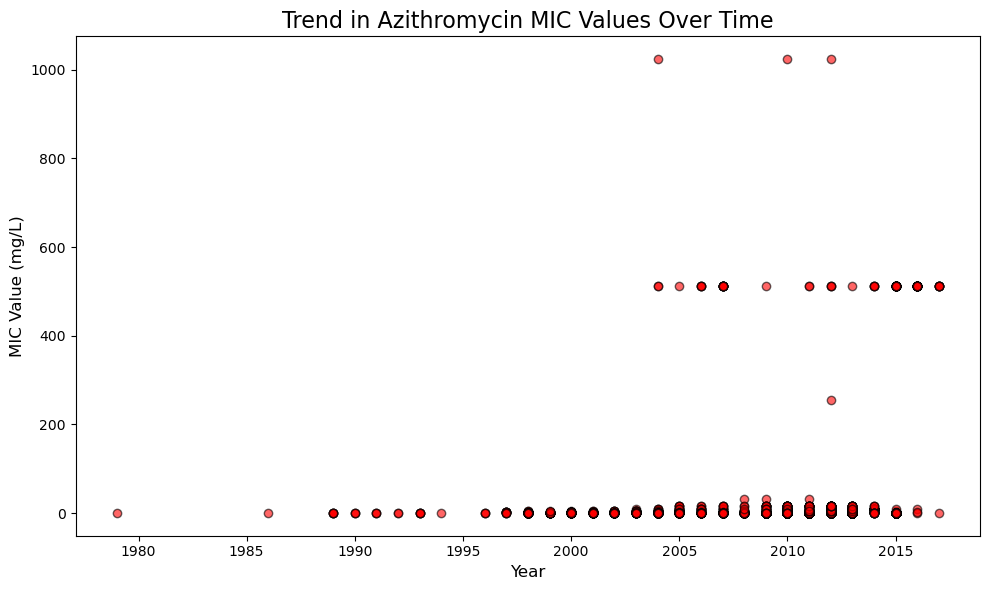

In [15]:
# AZITHROMYCIN MIC SCATTER PLOT 

# Filter for Azithromycin data (drop rows where 'azm_mic' is NaN)
azm_scatter_data = clinical_cleaned[['year', 'azm_mic']].dropna()

# Plot the scatter plot for Azithromycin MIC
plt.figure(figsize=(10, 6))
plt.scatter(
    azm_scatter_data['year'], 
    azm_scatter_data['azm_mic'], 
    alpha=0.6, 
    c='red', 
    edgecolors='black'
)
plt.title('Trend in Azithromycin MIC Values Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('MIC Value (mg/L)', fontsize=12)
plt.tight_layout()
plt.show()

# # Group by 'year' and calculate statistics for Azithromycin MIC
# azm_stats_by_year = azm_scatter_data.groupby('year')['azm_mic'].agg(['count', 'mean', 'median', 'min', 'max']).sort_index()
# print("=== Azithromycin MIC Statistics by Year ===")
# print(azm_stats_by_year)

#### **Azithromycin MIC Trend**
The Azithromycin scatter plot indicates that early data is sparse and low. In later years, while most values hover around 0.5 mg/L, some years exhibit markedly higher MIC values—up to 512 mg/L—suggesting emerging resistance in a subset of isolates.


---

### **4.2 Water Dataset**
To analyze temporal changes in antibiotic levels, the dataset was split into two periods: Pandemic and Inter-Pandemic.

#### **Box Plots and Descriptive Statistics**

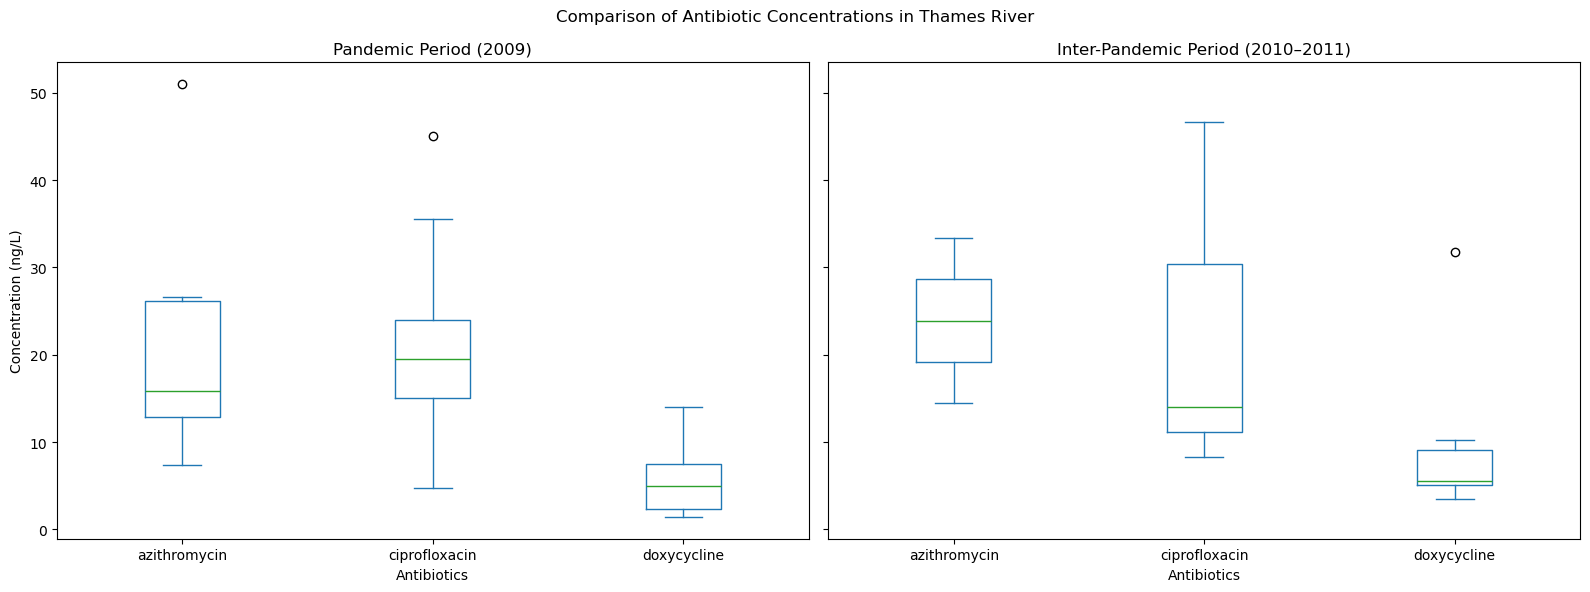

In [16]:
# Filter data for the two key periods in the water dataset
pandemic_data = water_cleaned[water_cleaned['date'].dt.year == 2009]
inter_pandemic_data = water_cleaned[water_cleaned['date'].dt.year.isin([2010, 2011])]

# Box plots for the pandemic and inter-pandemic periods
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Pandemic Period (2009)
pandemic_data[['azithromycin', 'ciprofloxacin', 'doxycycline']].plot.box(
    ax=axes[0], title="Pandemic Period (2009)"
)
axes[0].set_ylabel("Concentration (ng/L)")
axes[0].set_xlabel("Antibiotics")

# Inter-Pandemic Period (2010–2011)
inter_pandemic_data[['azithromycin', 'ciprofloxacin', 'doxycycline']].plot.box(
    ax=axes[1], title="Inter-Pandemic Period (2010–2011)"
)
axes[1].set_xlabel("Antibiotics")

# Adjust layout
fig.suptitle("Comparison of Antibiotic Concentrations in Thames River")
plt.tight_layout()
plt.show()

# Descriptive statistics for the water dataset
pandemic_stats = pandemic_data.describe()
inter_pandemic_stats = inter_pandemic_data.describe()

# print("\nPandemic Period Descriptive Statistics (2009):")
# print(pandemic_stats[['azithromycin', 'ciprofloxacin', 'doxycycline']])
# 
# print("\nInter-Pandemic Period Descriptive Statistics (2010–2011):")
# print(inter_pandemic_stats[['azithromycin', 'ciprofloxacin', 'doxycycline']])


Box plots and descriptive statistics for the water dataset provide insights into temporal variations in antibiotic concentrations:

- **2009 (Pandemic):**
  **Mean Concentrations:**  
    - Azithromycin: 20.61 ng/L  
    - Ciprofloxacin: 20.01 ng/L  
    - Doxycycline: 5.78 ng/L  

Lower standard deviations indicate more consistent antibiotic levels.

<br>

- **2010–2011 (Inter-Pandemic):**
  **Mean Concentrations:**  
    - Azithromycin: 23.92 ng/L  
    - Ciprofloxacin: 22.98 ng/L  
    - Doxycycline: 10.25 ng/L
  
Higher standard deviations suggest increased fluctuations in antibiotic concentrations.

<br>

---

<br>

#### **Grouped Bar Chart**

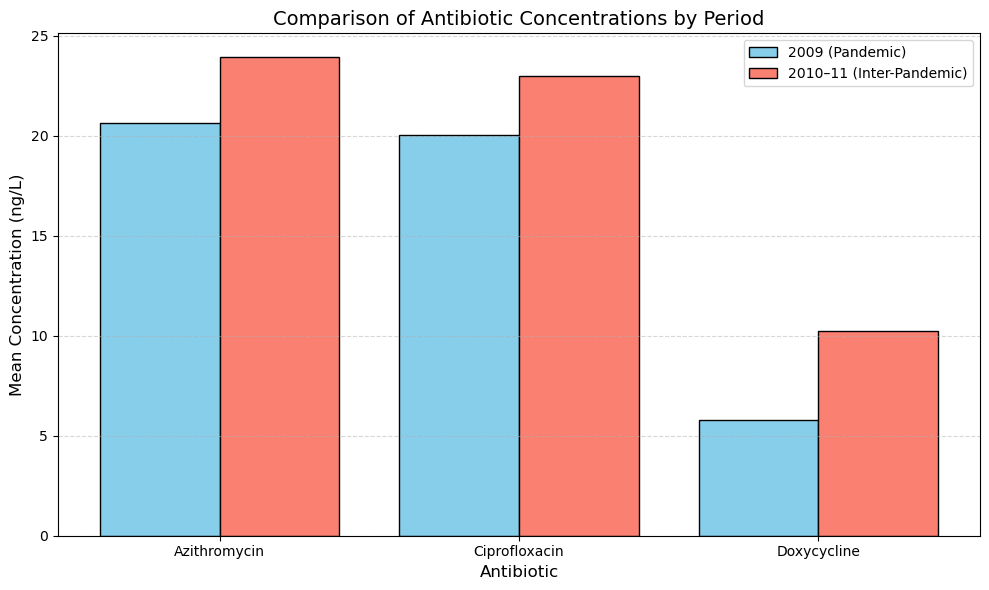

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two time periods
pandemic_data = water_cleaned[water_cleaned['date'].dt.year == 2009]
inter_pandemic_data = water_cleaned[water_cleaned['date'].dt.year.isin([2010, 2011])]

# List of antibiotics to compare
antibiotics = ['azithromycin', 'ciprofloxacin', 'doxycycline']

# Calculate mean concentrations for each antibiotic in both periods
pandemic_means = pandemic_data[antibiotics].mean()
inter_pandemic_means = inter_pandemic_data[antibiotics].mean()

# Create the x positions for each antibiotic
x = np.arange(len(antibiotics))
width = 0.4  # width of each bar

plt.figure(figsize=(10, 6))

# Bar chart for 2009 (pandemic)
plt.bar(
    x - width / 2, 
    pandemic_means, 
    width=width, 
    color='skyblue', 
    edgecolor='black', 
    label='2009 (Pandemic)'
)

# Bar chart for 2010–2011 (inter-pandemic)
plt.bar(
    x + width / 2, 
    inter_pandemic_means, 
    width=width, 
    color='salmon', 
    edgecolor='black', 
    label='2010–11 (Inter-Pandemic)'
)

# Customize x-axis labels
plt.xticks(x, [col.capitalize() for col in antibiotics])
plt.xlabel("Antibiotic", fontsize=12)
plt.ylabel("Mean Concentration (ng/L)", fontsize=12)
plt.title("Comparison of Antibiotic Concentrations by Period", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


The bar chart highlights an **increase in mean concentrations** of Azithromycin, Ciprofloxacin, and Doxycycline from the pandemic to the inter-pandemic period. This rise may reflect heightened pharmaceutical usage or changes in environmental management practices during these years (Kümmerer, 2009).

<br>

---

<br>

#### **Histograms**

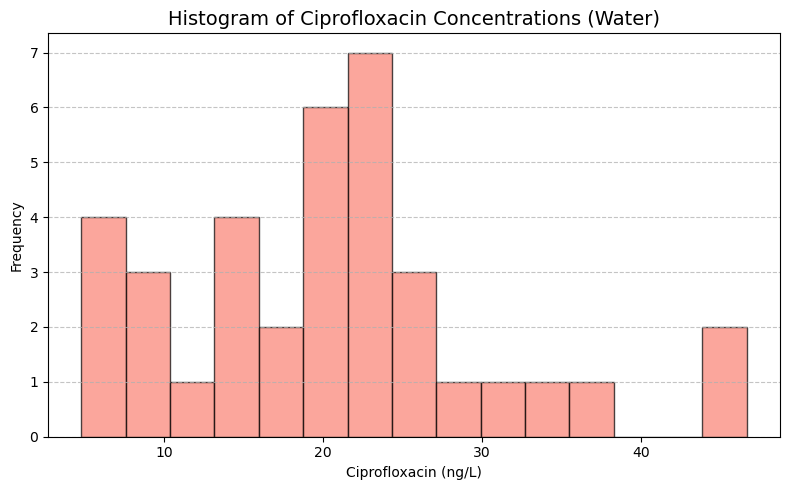

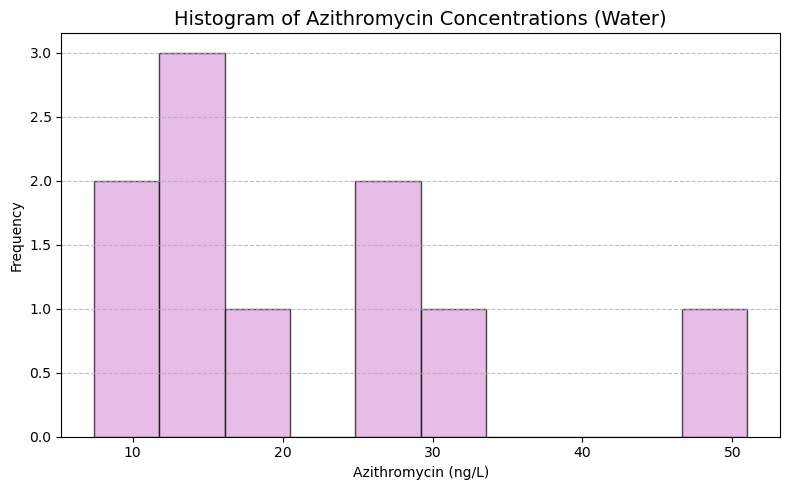

In [18]:
# CIPROFLOXACIN (Water)
# Filter out NaN values
cip_water_data = water_cleaned['ciprofloxacin'].dropna()

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(cip_water_data, bins=15, color='salmon', edgecolor='black', alpha=0.7)
plt.title("Histogram of Ciprofloxacin Concentrations (Water)", fontsize=14)
plt.xlabel("Ciprofloxacin (ng/L)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.tight_layout()
plt.show()


# AZITHROMYCIN (Water) 
# Filter out NaN values
azm_water_data = water_cleaned['azithromycin'].dropna()

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(azm_water_data, bins=10, color='plum', edgecolor='black', alpha=0.7)
plt.title("Histogram of Azithromycin Concentrations (Water)", fontsize=14)
plt.xlabel("Azithromycin (ng/L)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.tight_layout()
plt.show()

The histograms reveal the distribution of antibiotic concentrations, showing a spread of values with some high outliers, indicating areas with significant environmental contamination(Kümmerer, 2009).

<br>

**Key Takeaway from Water Dataset Exploring:**

Antibiotic concentrations in the Thames River **increased** from 2009 to 2010–2011, accompanied by greater variability. This trend may be attributed to changes in pharmaceutical usage and environmental management practices during and after the pandemic period.


<br>

---

<br>


### **4.3 Data Explanation based on resistance limits**

#### MIC Breakpoints for Antibiotic Resistance Interpretation
To better understand the thresholds used in this analysis, the following table from EUCAST (European Committee on Antimicrobial Susceptibility Testing) outlines the MIC (Minimum Inhibitory Concentration) breakpoints for the tested antibiotics (EUCAST, 2021). These breakpoints define the concentration at which N. gonorrhoeae isolates are considered resistant or susceptible to a particular antibiotic.

#### **EUCAST Breakpoints for Tested Antibiotics**
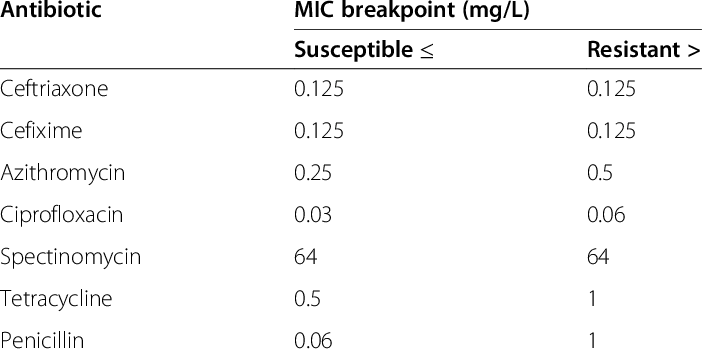
Source: [ResearchGate](https://www.researchgate.net/figure/EUCAST-breakpoints-used-for-MIC-interpretation-for-the-tested-antibiotics_tbl2_344378121) 
#### **Antibiotic Resistance Trends by Country (1995–2017)**
This section presents line graphs (**Time-Series**) illustrating the trends in antibiotic resistance across five countries: the UK, USA, Canada, Denmark, and Japan. The antibiotics analyzed include Azithromycin, Ciprofloxacin, Ceftriaxone, Cefixime, Tetracycline, and Penicillin. Outliers were removed using the interquartile range (IQR) method to ensure a more accurate depiction of trends.

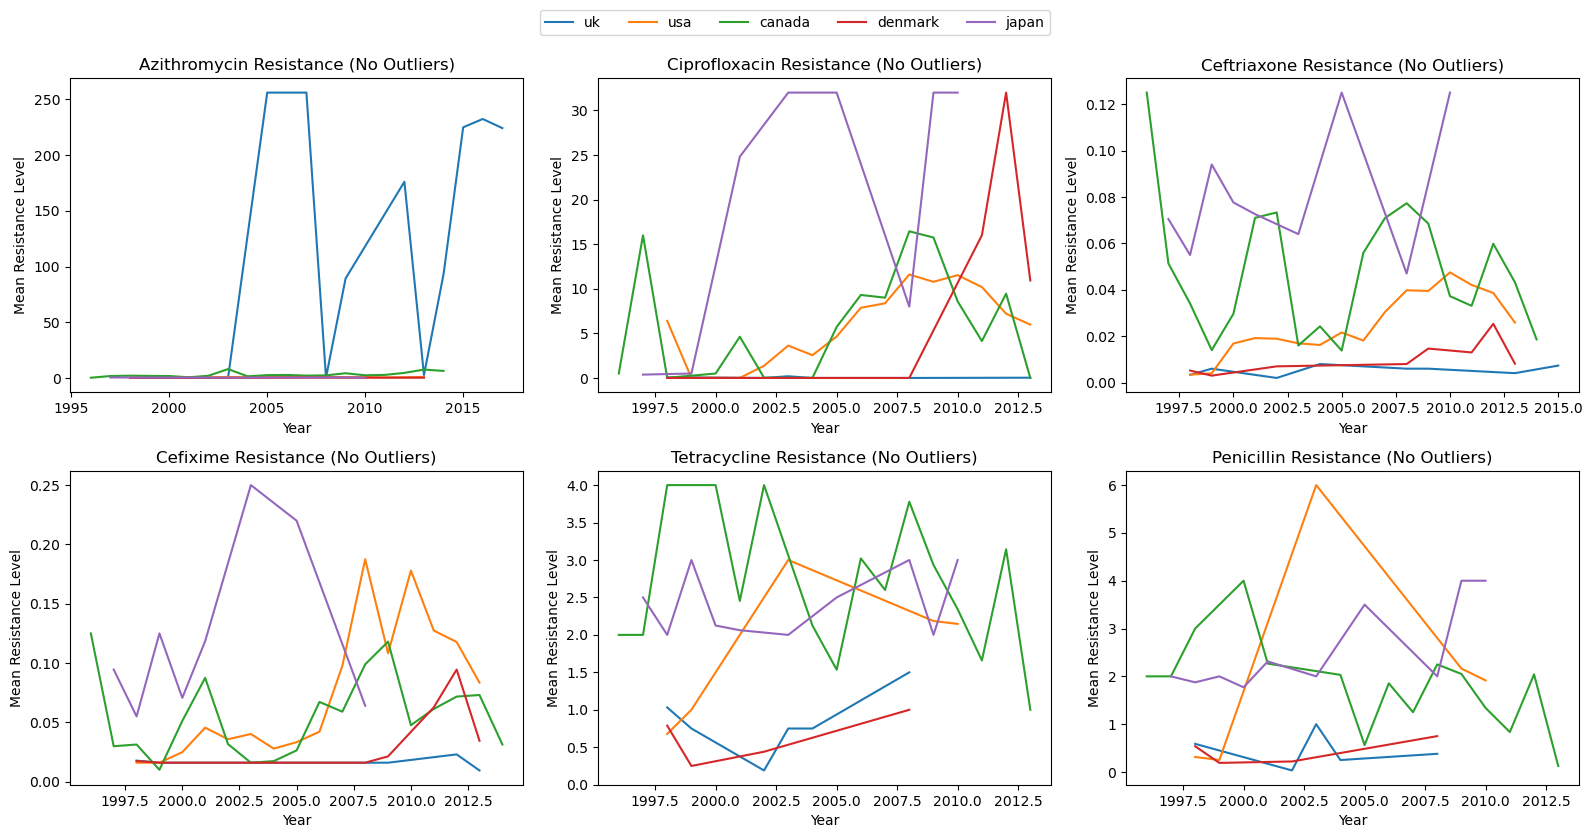

In [19]:
# List of antibiotics we want to plot
antibiotic_columns = [
    'azithromycin', 
    'ciprofloxacin', 
    'ceftriaxone', 
    'cefixime', 
    'tetracycline', 
    'penicillin'
]

# Countries of interest
countries_of_interest = ['uk', 'usa', 'canada', 'denmark', 'japan']

# Helper function to remove outliers based on IQR
def remove_outliers(data, column, multiplier=1.5):
    """
    Removes outliers from `data` for a specific `column` using the IQR rule.
    """
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Create a figure with 2 rows and 3 columns (for 6 total subplots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8), sharex=False, sharey=False)
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through each antibiotic and create a line plot
for i, antibiotic in enumerate(antibiotic_columns):
    ax = axes[i]
    
    # Plot each country's mean resistance over the years
    for country in countries_of_interest:
        # Filter rows for this country, year >= 1995, and antibiotic is not NaN
        sub_df = clinical_cleaned[ 
            (clinical_cleaned['country'] == country) &
            (clinical_cleaned['year'] >= 1995) &
            (clinical_cleaned[antibiotic].notna())
        ]
        
        if not sub_df.empty:
            # Remove outliers in the antibiotic column
            sub_df_no_outliers = remove_outliers(sub_df, antibiotic, multiplier=1.5)
            
            # Group by year and compute mean for the antibiotic
            yearly_means = sub_df_no_outliers.groupby('year')[antibiotic].mean().sort_index()
            
            # Only plot if there's data left after removing outliers
            if not yearly_means.empty:
                ax.plot(yearly_means.index, yearly_means.values, label=country)
    
    # Set subplot title and labels
    ax.set_title(f'{antibiotic.title()} Resistance (No Outliers)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Resistance Level')

# Retrieve handles/labels from the last subplot (or any subplot that has them)
handles, labels = ax.get_legend_handles_labels()

# Place one common legend at the top center outside the plots
fig.legend(handles, labels, loc='upper center', ncol=len(countries_of_interest), bbox_to_anchor=(0.5, 1.05))

# Tight layout so subplots don't overlap
plt.tight_layout()
plt.show()




Based on the generated plots and numeric data:

### Azithromycin
- **Overall Trend**: 
  - The UK shows relatively low average resistance from 1998–2004, but from ~2015 onward, the mean resistance values begin to rise, in some cases **≥ 1.0** mg/L.  
  - The USA, Canada, and Denmark show gradual increases over the years, with some fluctuations. Notably, Canada's resistance exceeds 4 mg/L from 2009 onward.
- **Clinical Relevance**: 
  - EUCAST classifies *N. gonorrhoeae* as resistant to Azithromycin if MIC > 0.5 mg/L. Many of these mean values exceed 0.5, suggesting possible resistance in these populations.
- **Historical Use**: Azithromycin used to be a front-line therapy for gonorrhoea in combination with other agents, but emerging resistance trends have led to reconsideration of treatment regimens in many regions.

### Ciprofloxacin
- **Overall Trend**:
  - Ciprofloxacin resistance has spiked drastically in several countries. The data show **mean values** for the USA and Japan often exceeding 4–8 mg/L, which is well beyond the 0.06 mg/L threshold for susceptibility.
  - In Canada, after ~2004, mean values sometimes exceed 8 or 16 mg/L, indicating **high-level resistance**.
- **Clinical Relevance**:
  - Ciprofloxacin was once a standard treatment for gonorrhoea, but widespread resistance (MIC > 0.06 mg/L) has made it ineffective in many places.
- **Historical Use**: 
  - Because of high resistance rates, **Ciprofloxacin** is no longer recommended by the CDC for treating gonorrhoea in the USA since 2007.

### Ceftriaxone
- **Overall Trend**:
  - Generally, mean MICs remain relatively low (≤ 0.06–0.125 mg/L) in many years, especially in earlier data. However, some spikes appear in more recent years in the USA and Canada, indicating potential reduced susceptibility.
  - The values often hover around 0.01–0.07 mg/L, so while some isolates still appear mostly susceptible, creeping MICs are concerning.
- **Clinical Relevance**:
  - Current **first-line therapy** for gonorrhoea typically includes Ceftriaxone due to increasing resistance to other antibiotics. EUCAST calls isolates with > 0.125 mg/L resistant, so these spikes near or above 0.125 are alarming.

### Cefixime
- **Overall Trend**:
  - Similar to Ceftriaxone but historically used as an **oral** alternative. Some countries (like the USA and Canada) show gradually increasing MIC values, approaching or exceeding 0.125 mg/L around the mid-2000s to 2010s.
- **Clinical Relevance**:
  - Like Ceftriaxone, *N. gonorrhoeae* is considered resistant to Cefixime if MIC > 0.125 mg/L. Increasing values highlight potential future losses in Cefixime efficacy.

### Tetracycline
- **Overall Trend**:
  - High variability. Canada and Japan sometimes exceed 2–4 mg/L. This is far above typical susceptibility breakpoints (0.5–1.0 mg/L).
- **Historical Use**:
  - Tetracycline was previously used for gonococcal infections; now, **high-level resistance** is widespread, making it generally obsolete for front-line therapy.

### Penicillin
- **Overall Trend**:
  - The data show that Penicillin values can exceed 1–2 mg/L in many regions. This is well beyond the resistance threshold (EUCAST R if >1 mg/L).
- **Historical Use**:
  - Penicillin G used to be the **gold standard** for gonorrhoea treatment decades ago, but widespread resistance has rendered it largely ineffective. The data confirm these higher MIC levels.

#### **Key Findings**:
  - *N. gonorrhoeae* has developed widespread resistance to older antibiotics like **Penicillin** and **Tetracycline**, making them generally unusable in modern treatment regimens.
  - **Ciprofloxacin** is no longer viable due to high rates of resistance in most countries studied (USA, Canada, Japan, etc.).
  - **Ceftriaxone** and **Cefixime** remain crucial, but creeping MIC values highlight the need for **ongoing surveillance** and **potential new therapies**.
  - **Azithromycin** resistance is emerging, underscoring the risk of losing another important treatment option.


## **5. Answering the Research Questions**

**Research Question 1**:
How have resistance levels for key antibiotics (e.g., Azithromycin, Ciprofloxacin) changed over time across different countries or regions, and which regions show the most pronounced increases or stable trends?

**Answer**:
Analysis of the clinical dataset (1979–2017) reveals notable temporal shifts in resistance for both Azithromycin and Ciprofloxacin. For example, in UK clinical data:

**- Azithromycin**: Early years (prior to 2004) are characterized by low mean Minimum Inhibitory Concentrations (MICs). However, from around 2015 onward, the UK data exhibit a marked increase in MIC values—with outlier measurements reaching up to 512 mg/L—suggesting an emerging resistance trend. Similar upward trends are observed in other regions such as the USA and Canada, consistent with findings that increasing antibiotic use contributes to rising resistance (Laxminarayan et al., 2013; WHO, 2014).

**- Ciprofloxacin**: Although initial data indicate very low resistance, later time periods (post-late 1990s) display substantial variability with occasional high MICs (up to 64 mg/L). This trend is particularly pronounced in the USA and Japan and is likely related to differing regional prescribing practices and antibiotic stewardship policies (Kümmerer, 2009; Singer et al., 2016).

These trends suggest that while several regions still report low resistance for some antibiotics, there is an overall increasing pattern—especially notable for Azithromycin and Ciprofloxacin—which underscores the need for globally harmonized strategies for antibiotic use and resistance monitoring.

---

**Research Question 2**:
What do measured antibiotic concentrations in the Thames River reveal about potential environmental reservoirs of resistance, particularly for widely used antibiotics like Azithromycin and Ciprofloxacin?

**Answer**:
The water dataset from the Thames River (2009–2011) indicates that the mean concentrations of Ciprofloxacin and Azithromycin are in the tens of nanograms per liter range (approximately 20–30 ng/L for Ciprofloxacin and 20–24 ng/L for Azithromycin). Although these concentrations are much lower than clinical MIC values, their persistent presence in the aquatic environment is concerning. Sub-inhibitory antibiotic concentrations in water bodies can serve as a continuous selective pressure, thereby promoting the maintenance and horizontal transfer of resistance genes among environmental bacteria (Larsson, 2007; Martínez, 2009). This supports the hypothesis that water systems may act as long‐term reservoirs that facilitate the emergence and spread of antibiotic resistance.

---

**Research Question 3**:
Which factors—such as antibiotic type, region, or water contamination levels—most strongly predict or correlate with rising clinical resistance trends?

**Answer**:
Multiple factors appear to contribute to rising clinical resistance trends:

**- Antibiotic Type**: The analysis reveals that older antibiotics (e.g., Penicillin, Tetracycline) already exhibit widespread resistance. In contrast, the trends for Azithromycin and Ciprofloxacin show substantial increases in certain regions (e.g., the UK, USA, and Canada). These differences suggest that antibiotic-specific factors (such as pharmacodynamics, usage patterns, and history of deployment) play a significant role in resistance evolution (Laxminarayan et al., 2013).

**- Regional Variation**: The regional disparity in resistance trends is evident. For instance, the UK clinical data indicate a clear upward trend in both Azithromycin and Ciprofloxacin MICs over recent years, whereas other regions exhibit differing patterns. Such variation underscores that local prescribing practices, regulatory policies, and public health initiatives shape resistance outcomes (CDC, 2013; WHO, 2014).

**- Environmental Contamination**: The water dataset shows persistent but low-level antibiotic concentrations, which may serve as a selective pressure in the environment and contribute indirectly to clinical resistance trends. Although direct causality cannot be inferred without further statistical analysis, these patterns reinforce the idea that environmental reservoirs can influence the prevalence and spread of resistant organisms (Larsson, 2007; Martínez, 2009).

Taken together, while our analysis qualitatively supports the influence of antibiotic type, regional differences, and environmental contamination on clinical resistance trends, advanced multivariate modeling could quantitatively assess their relative contributions.

<br>

---
<br>  

## **Conclusion and Evaluation**
This investigation integrated clinical and environmental datasets to explore trends in antibiotic resistance. Our analysis uncovered significant increases in resistance for agents like Azithromycin and Ciprofloxacin over time, while older antibiotics such as Penicillin and Tetracycline already exhibit widespread resistance. The environmental data also suggest that even low-level antibiotic contamination in water bodies may support the persistence and spread of resistance genes.

Overall, the visualisations and statistical summaries effectively highlighted key trends and regional disparities. Despite the strengths of robust data cleaning and diverse visualisation techniques, limitations such as missing data and variable regional coverage indicate areas for further improvement. This study demonstrates the value of data visualisation in understanding antibiotic resistance and underscores the need for enhanced data quality and ongoing surveillance.

<br>

---

<br>


### **References**


Centers for Disease Control and Prevention (CDC). (2013). Antibiotic Resistance Threats in the United States, 2013. Atlanta, GA: U.S. Department of Health and Human Services. Available at: https://www.cdc.gov/antimicrobial-resistance/media/pdfs/ar-threats-2013-508.pdf?CDC_AAref_Val=https://www.cdc.gov/drugresistance/pdf/ar-threats-2013-508.pdf (Accessed: 23 December 2024).

European Committee on Antimicrobial Susceptibility Testing (EUCAST). (2021). Breakpoint tables for interpretation of MICs and zone diameters. Version 11.0. Available at: https://www.eucast.org/clinical_breakpoints/ (Accessed: 10 January 2025).

European Data Portal. (2011). River Pharmaceutical Concentrations Dataset. Available at: https://data.europa.eu/ (Accessed: 24 December 2025).

Kaggle. (2017). Predicting Antibiotic Resistance in Gonorrhoea. Available at: https://www.kaggle.com/ (Accessed: 24 December 2025).

Martínez, J. L. (2009). Environmental pollution by antibiotics and by antibiotic resistance determinants. Environmental Pollution, 157(11), pp. 2893–2902. doi:10.1016/j.envpol.2009.04.052.

Kümmerer, K. (2009). Antibiotics in the aquatic environment–a review–part I. Chemosphere, 75(4), pp.417–434. doi:10.1016/j.chemosphere.2008.11.062.

World Health Organization (WHO). (2014). Antimicrobial resistance: Global report on surveillance. Geneva: World Health Organization. Available at: https://www.who.int/antimicrobial-resistance/publications/global-report/en/ (Accessed: 23 December 2024).

Laxminarayan, R., Duse, A., Wattal, C., Zaidi, A. K. M., Wertheim, H. F. L., Sumpradit, N., ... & Cars, O. (2013). Antibiotic resistance—the need for global solutions. The Lancet Infectious Diseases, 13(12), pp. 1057–1098. doi:10.1016/S1473-3099(13)70318-9.

Larsson, D. G. J. (2007). Ecological and evolutionary consequences of antibiotic use in aquatic environments. FEMS Microbiology Ecology, 60(4), pp. 911–923. doi:10.1111/j.1574-6941.2006.00242.x.

Singer, A. C., Shaw, H., Rhodes, V., & Hart, A. (2016). Review of Antimicrobial Resistance in the Environment and Its Relevance to the Food Chain. FEMS Microbiology Ecology, 92(12), fiw116. doi:10.1093/femsec/fiv116.

Pandas Development Team. (2021). Pandas Documentation. Available at: https://pandas.pydata.org/docs/ (Accessed: 24 December 2024).

Matplotlib Development Team. (2021). Matplotlib Documentation. Available at: https://matplotlib.org/stable/contents.html (Accessed: 24 December 2024).